In [2]:
# !pip install -r requirements.txt -q
# !pip install ipython-autotime -q

time: 6.87 s (started: 2024-11-23 13:38:28 +00:00)


In [1]:
import ta
import yfinance as yf
import numpy as np
import pandas as pd
import joblib
from joblib import Parallel, delayed
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

%matplotlib inline
%load_ext autotime

# Download historical price data for a stock
tickers = ['AAPL', 'AMZN', 'GME', 'GOOGL', 'NFLX', 'TSLA', 'MSFT', 'NVDA', 'AMD', 'CRM', 'JPM', 'V', 'MA', 'MSTR', 'DIS', 
           'BA', 'XOM', 'ORCL', 'META', 'BRK', 'HSBC', 'MS', 'PYPL', 'BAC', 'BLK', 'GS']

time: 147 µs (started: 2024-11-25 05:40:27 +00:00)


In [2]:
def load_processed_data(data_dir='processed_data', df_name='', array_name=''):
    """
    Load processed DataFrames list and numpy arrays from files
    """
    data_path = Path(data_dir)
    
    # Load list of DataFrames
    with open(data_path / df_name, 'rb') as f:
        processed_dfs = joblib.load(f)
    
    # Load numpy arrays
    with open(data_path / array_name, 'rb') as f:
        values_list = joblib.load(f)
    
    return processed_dfs, values_list

dfs_list, values_list = load_processed_data(df_name='processed_dfs.pkl', array_name='values_array.pkl')

time: 59.4 ms (started: 2024-11-25 05:41:23 +00:00)


In [3]:
dfs_list[0]

Price,Adj Close,Close,High,Low,Open,Volume,RSI,WR,Price Momentum,Volume Momentum,...,Ulcer Index,ARIMA Output,Fourier Power,Fourier Phase,Fourier 3 Real,Fourier 6 Real,Fourier 9 Real,Fourier 100 Real,Fourier Significant real,Close Next Day
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-16,11.462601,13.588571,13.691786,13.430714,13.625714,1000000.0,53.720202,-40.920847,-0.007642,0.082958,...,6.368184,11.386598,564.736488,1.784183,50.608489,10.548855,-3.418024,12.356305,16.000357,13.587143
2011-08-17,11.461396,13.587143,13.732857,13.500000,13.653929,1000000.0,53.696962,-41.006850,-0.000105,-0.113662,...,6.416486,11.624125,497.700387,1.823144,50.372918,10.291735,-3.410067,12.751208,15.711276,13.073214
2011-08-18,11.027875,13.073214,13.308929,12.906071,13.244286,1000000.0,45.984883,-71.966454,-0.037825,0.926057,...,6.686873,11.368409,645.802434,1.591148,50.137814,10.037805,-3.396865,13.168186,15.424764,12.715357
2011-08-19,10.726002,12.715357,13.107143,12.714286,12.934643,1000000.0,41.513874,-93.293223,-0.027373,-0.088729,...,7.120951,11.025292,707.291371,1.742971,49.903177,9.787063,-3.378466,13.593889,15.140825,12.730000
2011-08-22,10.738355,12.730000,13.031429,12.681786,13.018214,1000000.0,41.763382,-91.561812,0.001152,-0.310062,...,7.472308,10.494964,569.391019,1.997446,49.669010,9.539509,-3.354922,14.014846,14.859461,13.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,230.316620,230.570007,230.820007,228.410004,229.979996,1000000.0,52.271541,-42.821761,-0.000823,-0.405024,...,2.031275,230.674707,21857.804244,-1.509946,105.115706,115.104123,117.980892,188.509112,114.330593,231.410004
2024-10-25,231.155685,231.410004,233.220001,229.570007,229.740005,1000000.0,53.621399,-42.696626,0.003643,0.247281,...,1.664750,231.297362,30163.314500,-1.569032,104.839212,114.481354,117.032685,177.737174,113.773702,233.399994


time: 17.2 ms (started: 2024-11-25 05:41:26 +00:00)


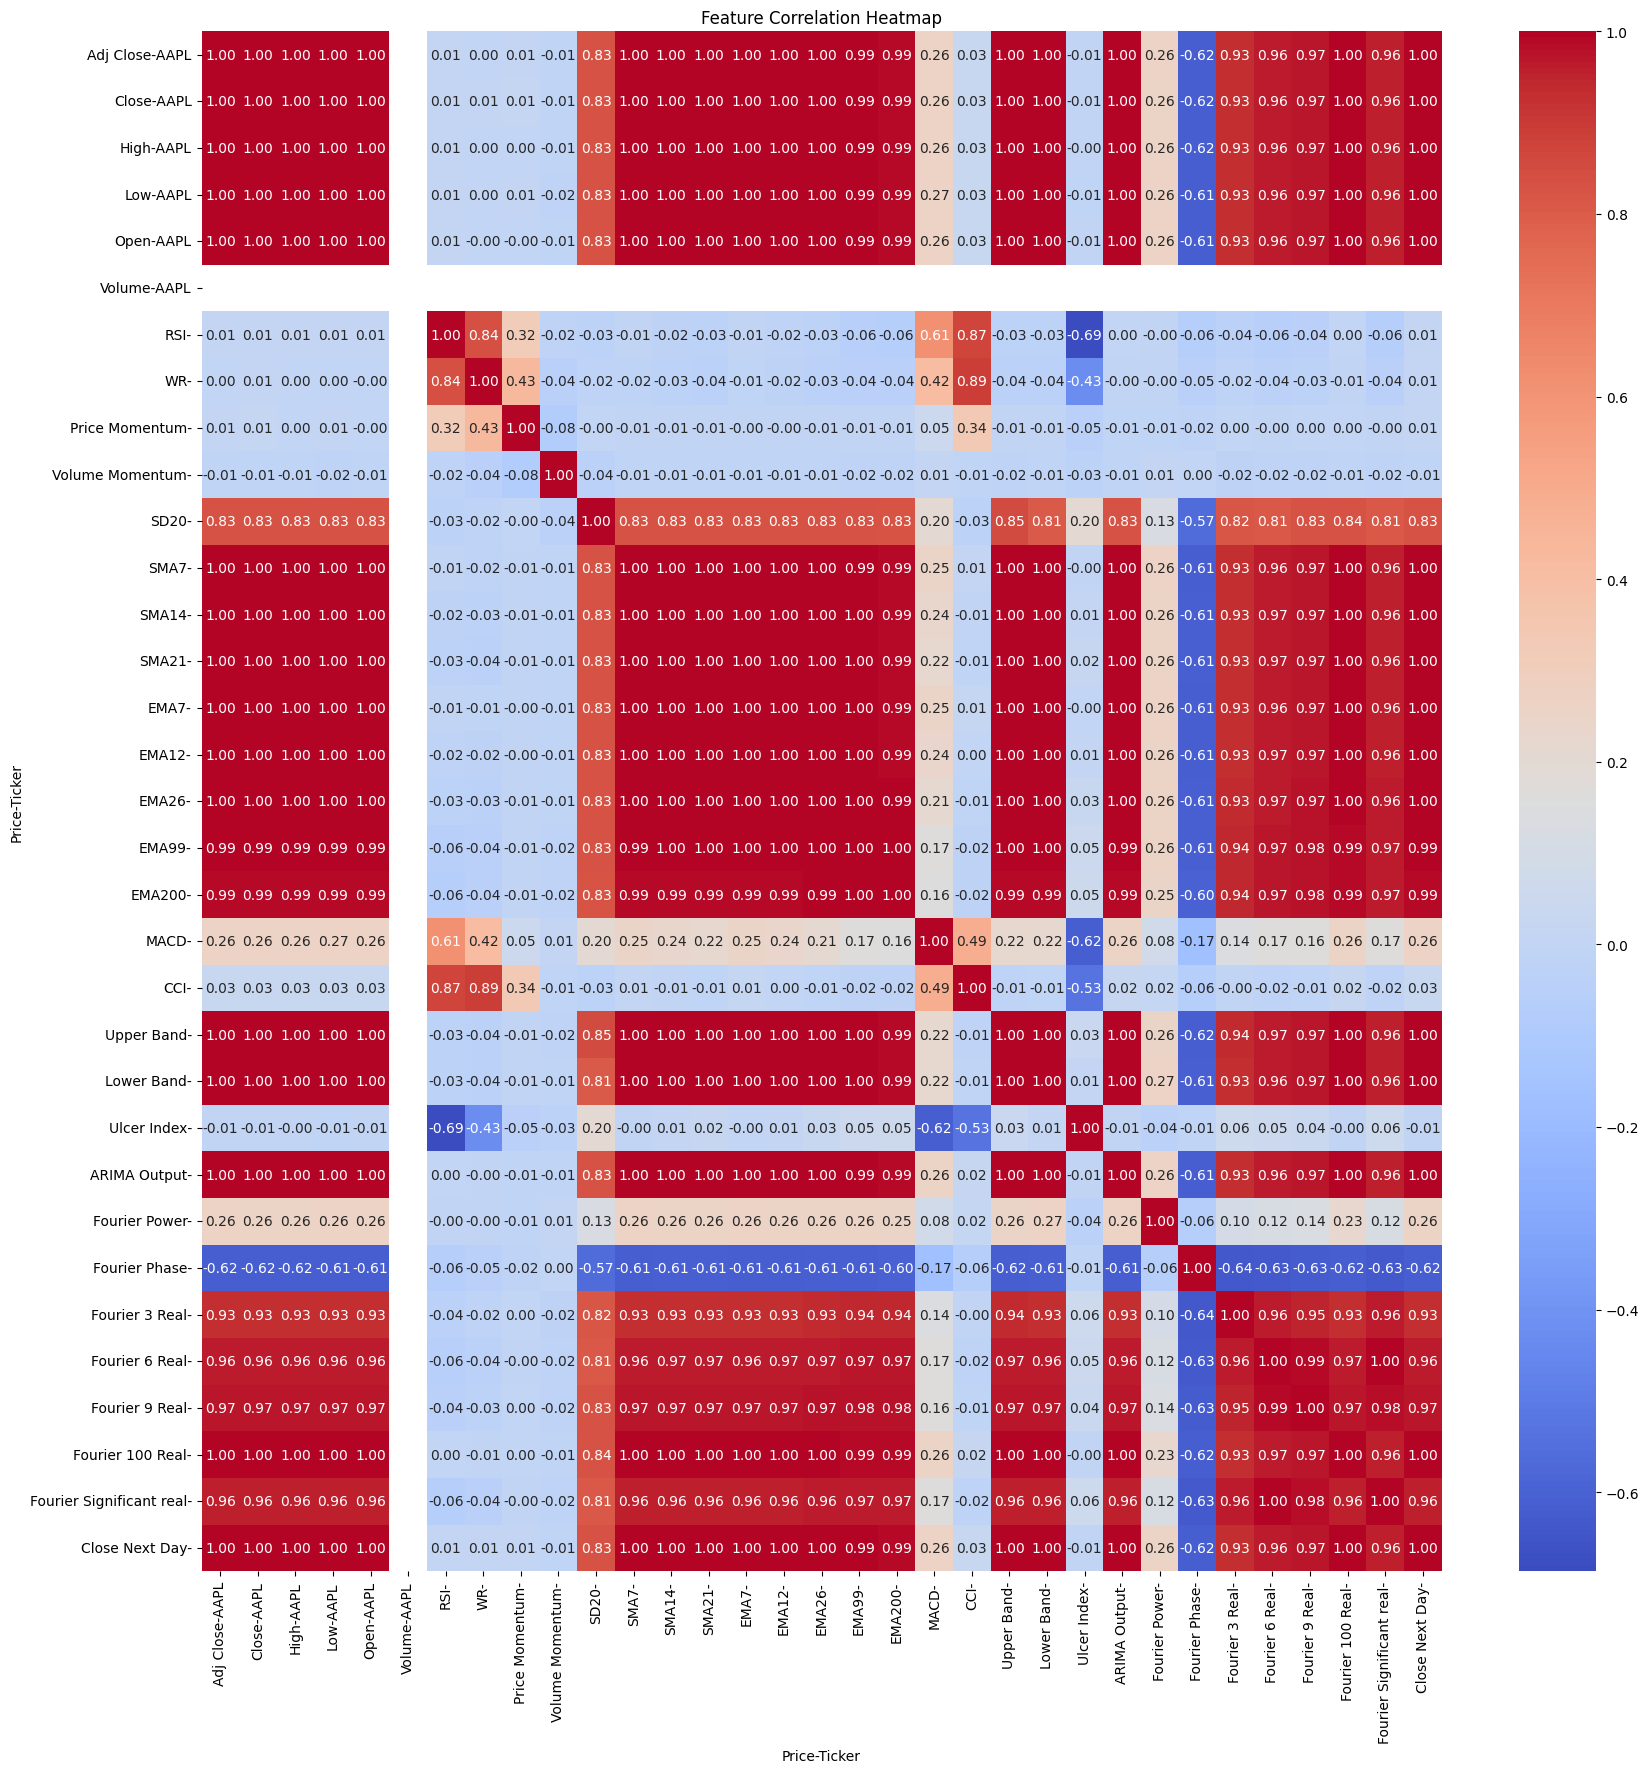

time: 1.42 s (started: 2024-11-25 05:42:31 +00:00)


In [6]:
# Compute the correlation matrix
correlation_matrix = dfs_list[0].corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

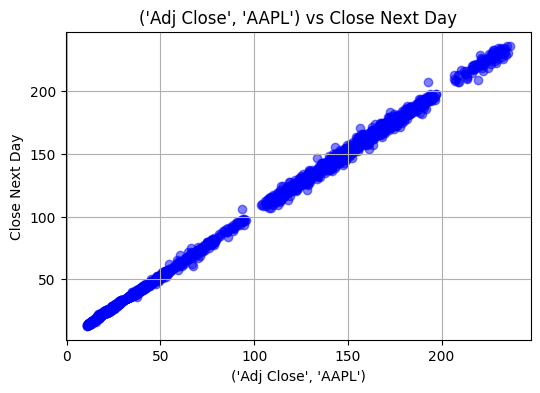

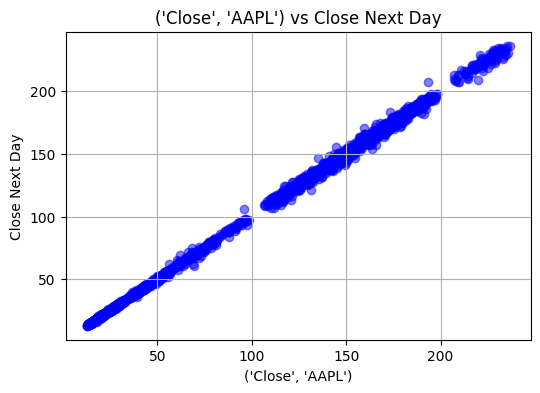

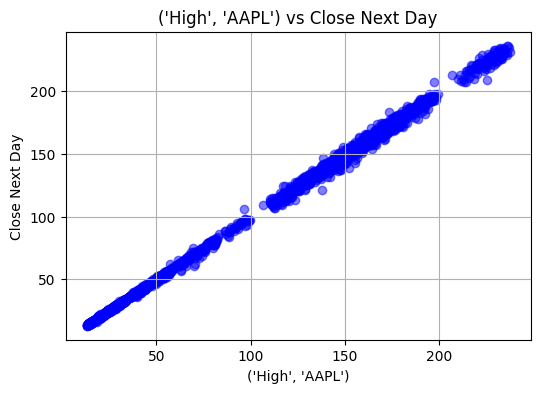

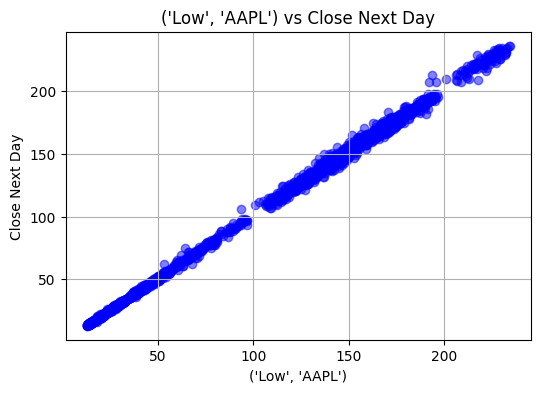

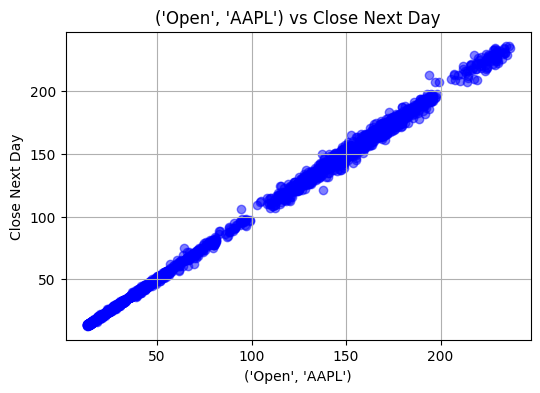

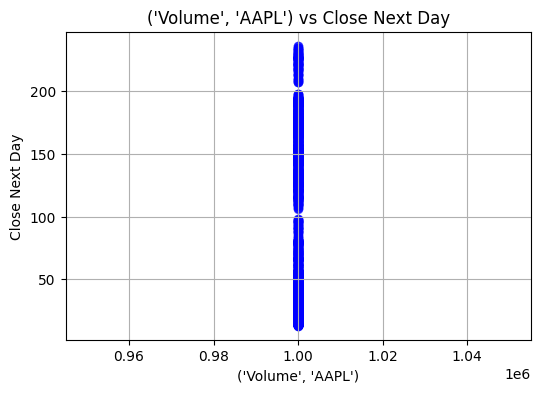

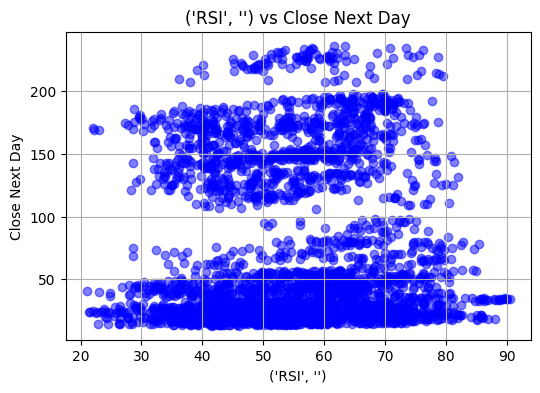

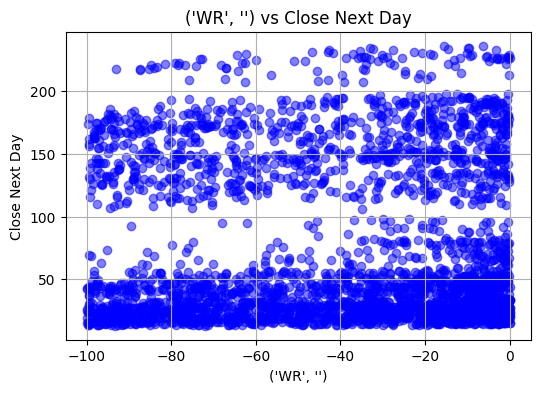

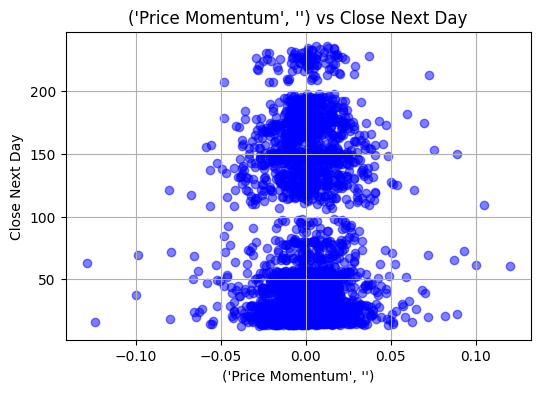

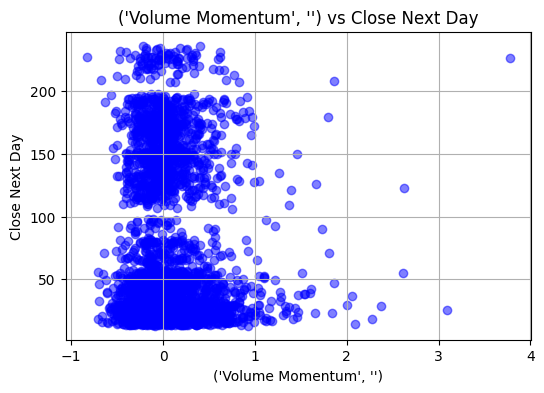

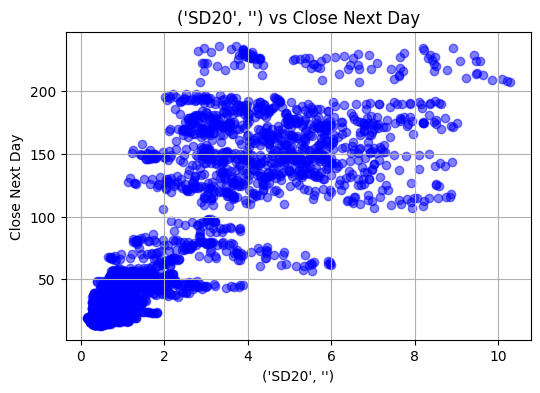

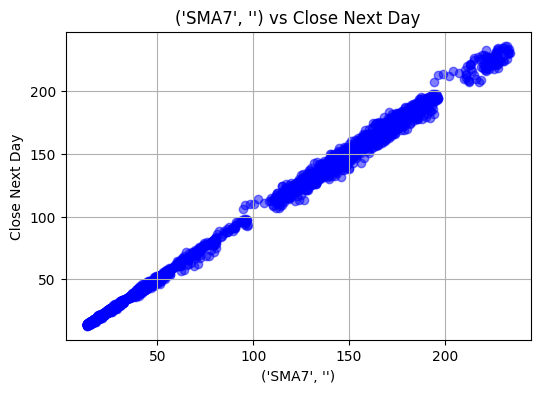

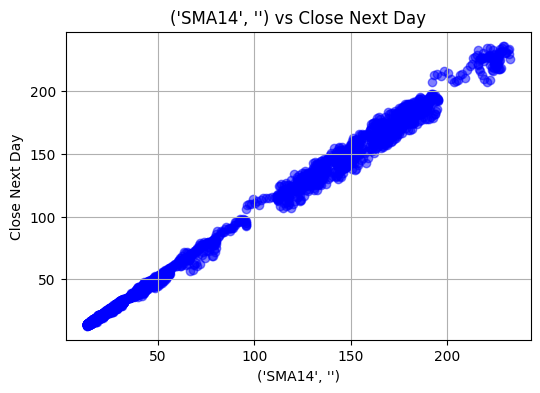

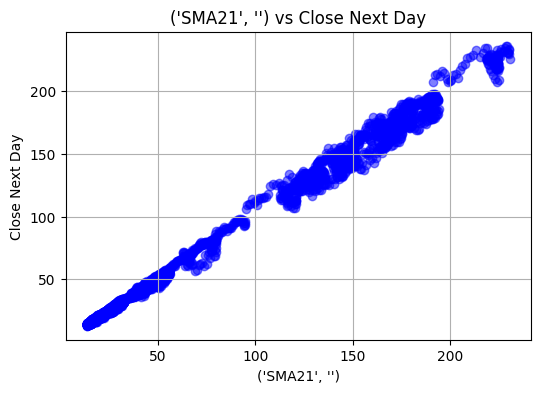

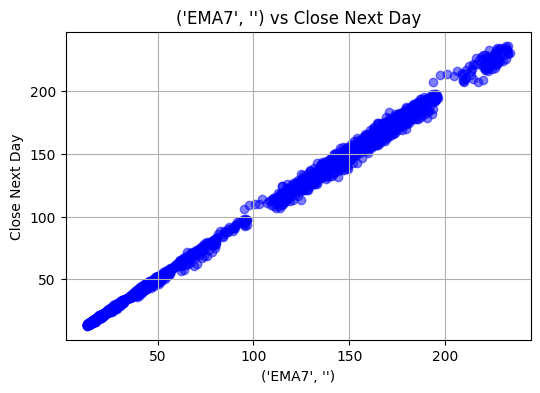

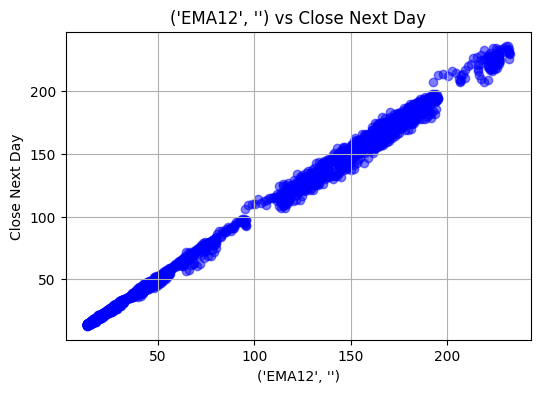

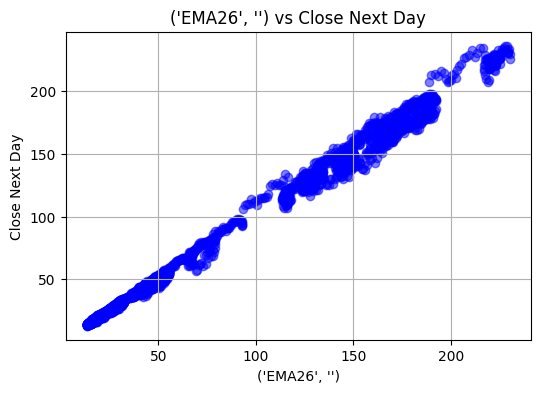

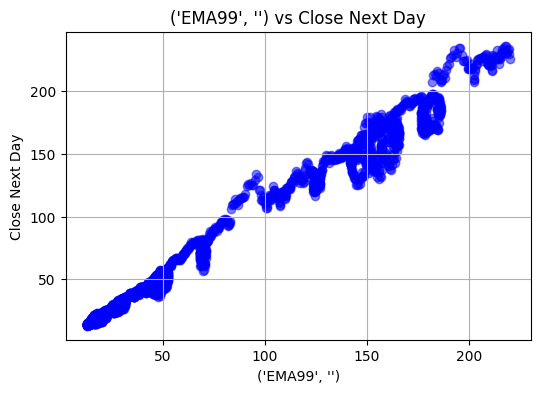

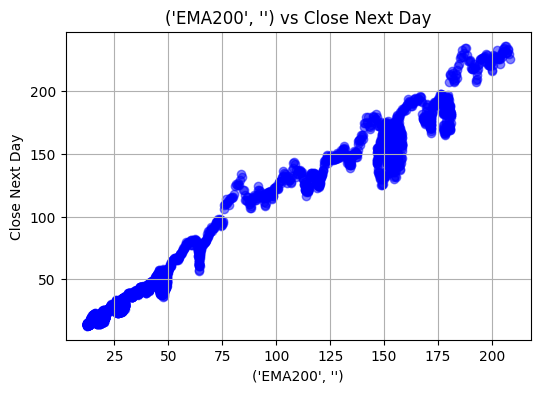

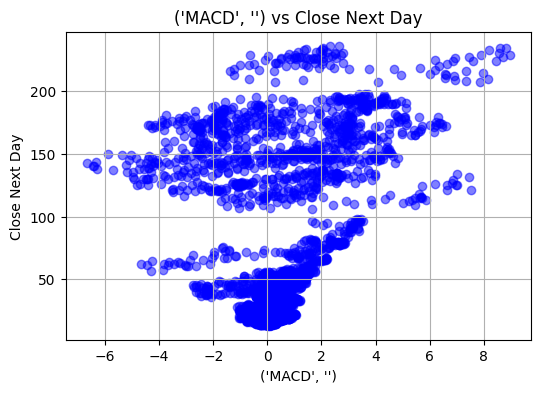

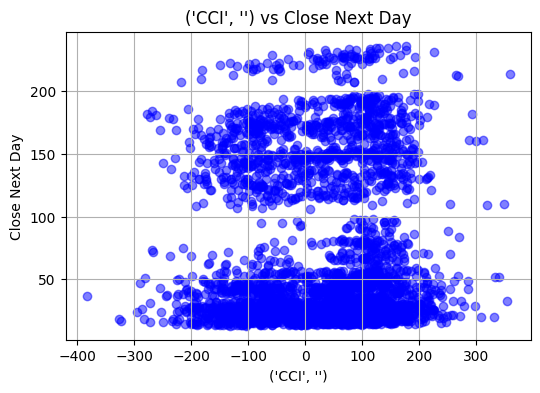

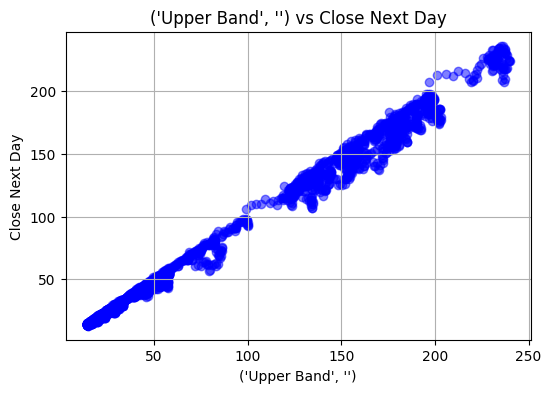

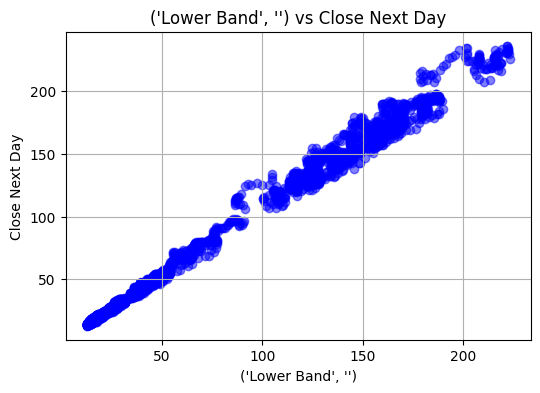

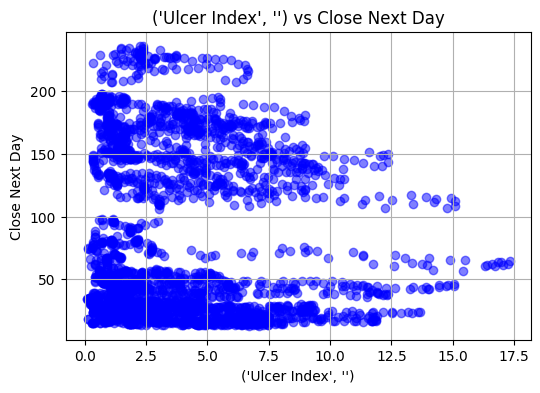

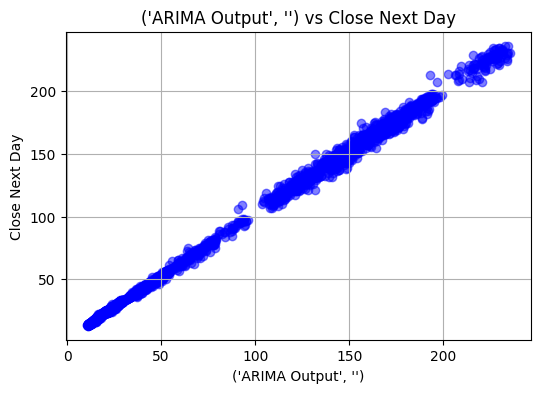

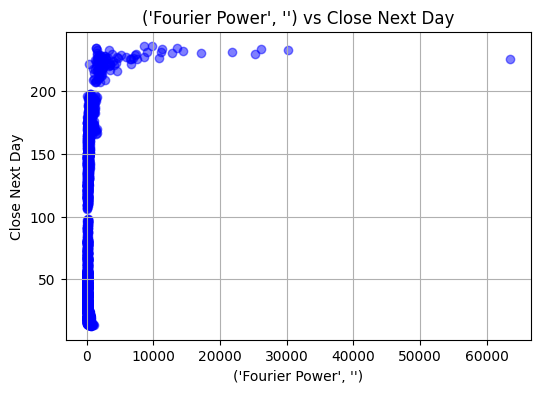

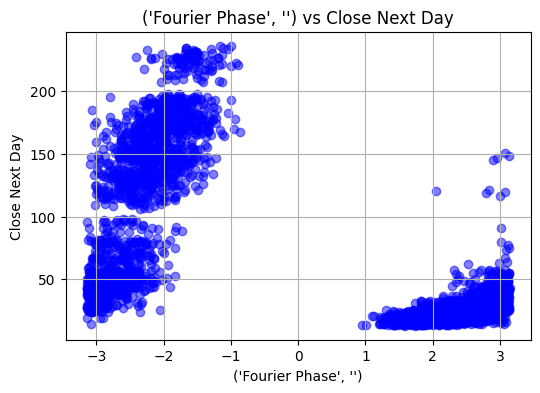

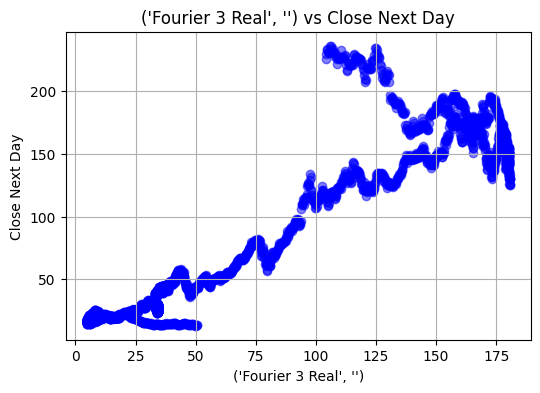

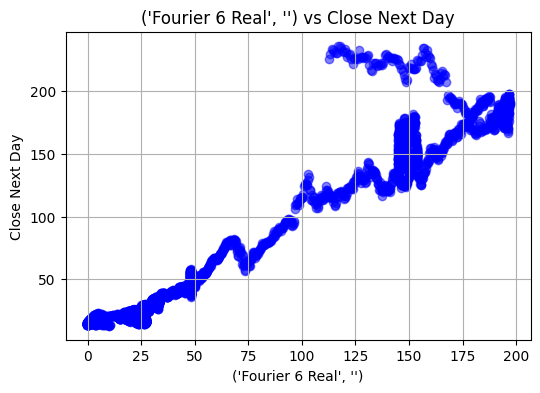

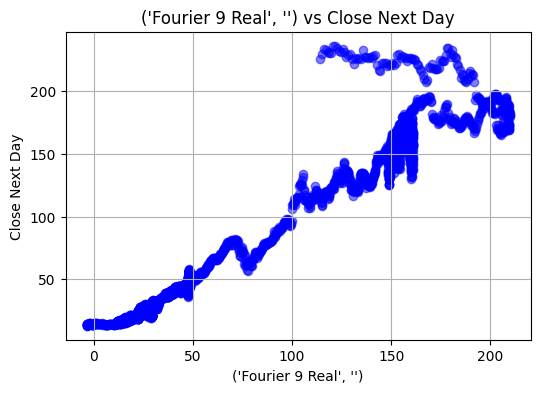

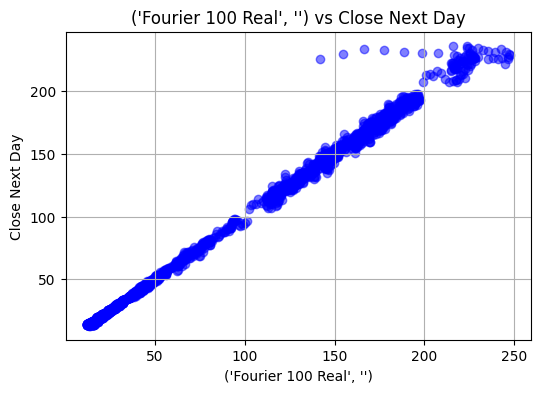

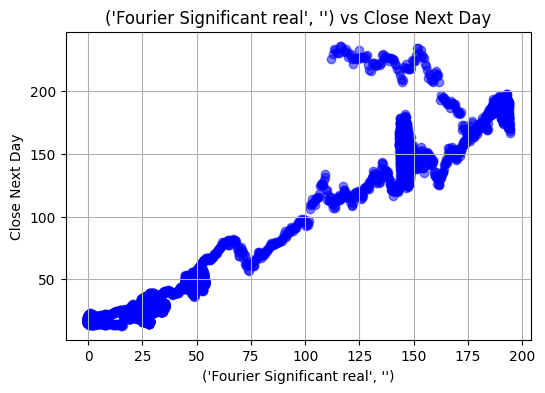

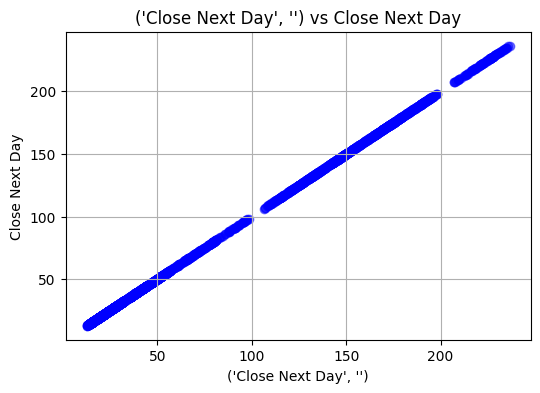

time: 3.17 s (started: 2024-11-25 05:50:19 +00:00)


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_features_vs_target(df, target_column, output_dir=None):
    """
    Iteratively creates scatter plots of all features vs. the target.
    
    Args:
        df (pd.DataFrame): The dataset containing features and the target.
        target_column (str): The name of the target column.
        output_dir (str): Directory to save plots (optional). If None, plots are displayed.
    
    Returns:
        None
    """
    features = [col for col in df.columns if col != target_column]
    target = df[target_column]
    
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], target, alpha=0.5, color='blue')
        plt.title(f"{feature} vs {target_column}")
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.grid(True)
        
        if output_dir:
            plt.savefig(f"{output_dir}/{feature}_vs_{target_column}.png", dpi=300, bbox_inches="tight")
        else:
            plt.show()
        plt.close()


plot_features_vs_target(dfs_list[0], target_column='Close Next Day', output_dir=None)  # Replace with your target column name

In [36]:
for i in range(len(dfs_list)):
    dfs_list[i].drop(dfs_list[i].columns[1:5], axis=1, inplace=True)
    dfs_list[i].drop(columns=['SMA14', 'SMA21', 'EMA7'],inplace=True)

time: 45 ms (started: 2024-11-24 05:22:11 +00:00)


/tmp/ipykernel_112/1267823736.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dfs_list[i].drop(columns=['SMA14', 'SMA21', 'EMA7'],inplace=True)


In [37]:
dfs_list[0]

Price,Adj Close,Volume,RSI,WR,Price Momentum,Volume Momentum,SD20,SMA7,EMA12,EMA26,...,Ulcer Index,ARIMA Output,Fourier Power,Fourier Phase,Fourier 3 Real,Fourier 6 Real,Fourier 9 Real,Fourier 100 Real,Fourier Significant real,Close Next Day
Ticker,AAPL,AAPL,,,,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-23,10.218670,1000000.0,45.129882,-63.484871,-0.005891,0.144432,0.319875,12.043061,12.220855,12.323176,...,4.863905,10.361211,2111.334350,1.392614,76.392495,51.985778,28.238596,13.803875,57.162874,10.392802
2011-03-24,10.392802,1000000.0,49.916460,-47.161812,0.017041,0.085029,0.318467,12.040714,12.236163,12.322967,...,4.925602,10.159153,2134.212905,1.789320,76.122099,51.443870,27.594235,14.532931,56.657213,10.590735
2011-03-25,10.590735,1000000.0,54.748644,-18.818231,0.019045,0.109209,0.320305,12.150561,12.285215,12.340155,...,4.902553,10.380963,1839.287828,1.943577,75.851917,50.904061,26.956050,15.176440,56.153055,10.557596
2011-03-28,10.557596,1000000.0,53.812478,-19.986852,-0.003129,-0.310875,0.317655,12.231173,12.320676,12.353159,...,4.878158,10.567645,1315.513538,2.037743,75.581952,50.366372,26.324077,15.715188,55.650416,10.573262
2011-03-29,10.573262,1000000.0,54.211076,-18.266099,0.001484,0.140762,0.318659,12.334694,12.353539,12.366576,...,4.850004,10.513687,1206.374877,2.010800,75.312206,49.830824,25.698351,16.133638,55.149313,10.503069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,230.316620,1000000.0,52.271541,-42.821761,-0.000823,-0.405024,3.892879,233.228570,231.616284,229.395186,...,2.031275,230.674707,21857.804244,-1.509946,105.115706,115.104123,117.980892,188.509112,114.330593,231.155685
2024-10-25,231.155685,1000000.0,53.621399,-42.696626,0.003643,0.247281,3.874728,233.175714,231.584548,229.544431,...,1.664750,231.297362,30163.314500,-1.569032,104.839212,114.481354,117.032685,177.737174,113.773702,233.143494


time: 25.3 ms (started: 2024-11-24 05:22:12 +00:00)


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days and Bollinger Bands')

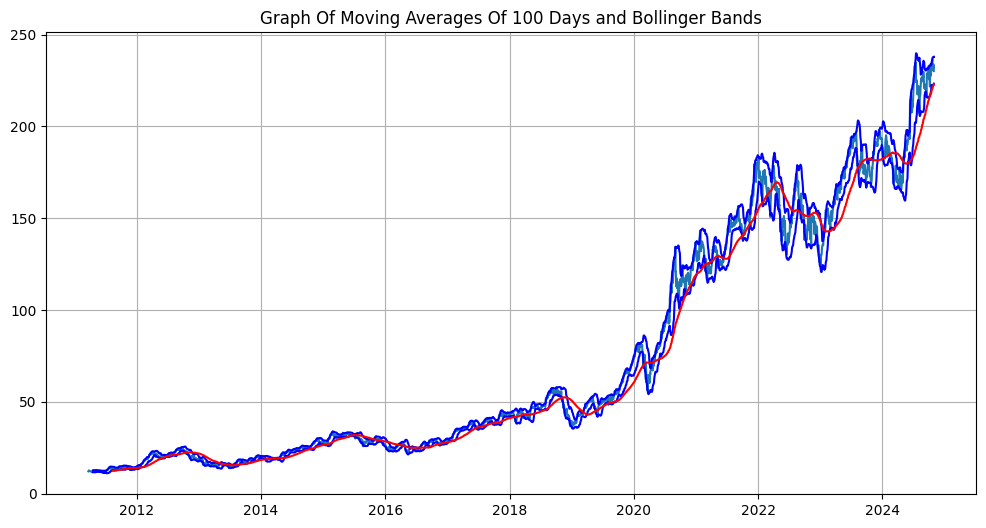

time: 314 ms (started: 2024-11-24 05:13:56 +00:00)


In [4]:
aapl_close = dfs_list[0]["Close"].squeeze() 
ma100 = aapl_close.rolling(100).mean()

BB = ta.volatility.BollingerBands(aapl_close, window=20)
high_band = BB.bollinger_hband()
low_band = BB.bollinger_lband()
    
plt.figure(figsize = (12,6))
plt.plot(aapl_close)
plt.plot(high_band, 'b')
plt.plot(low_band, 'b')
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days and Bollinger Bands')

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


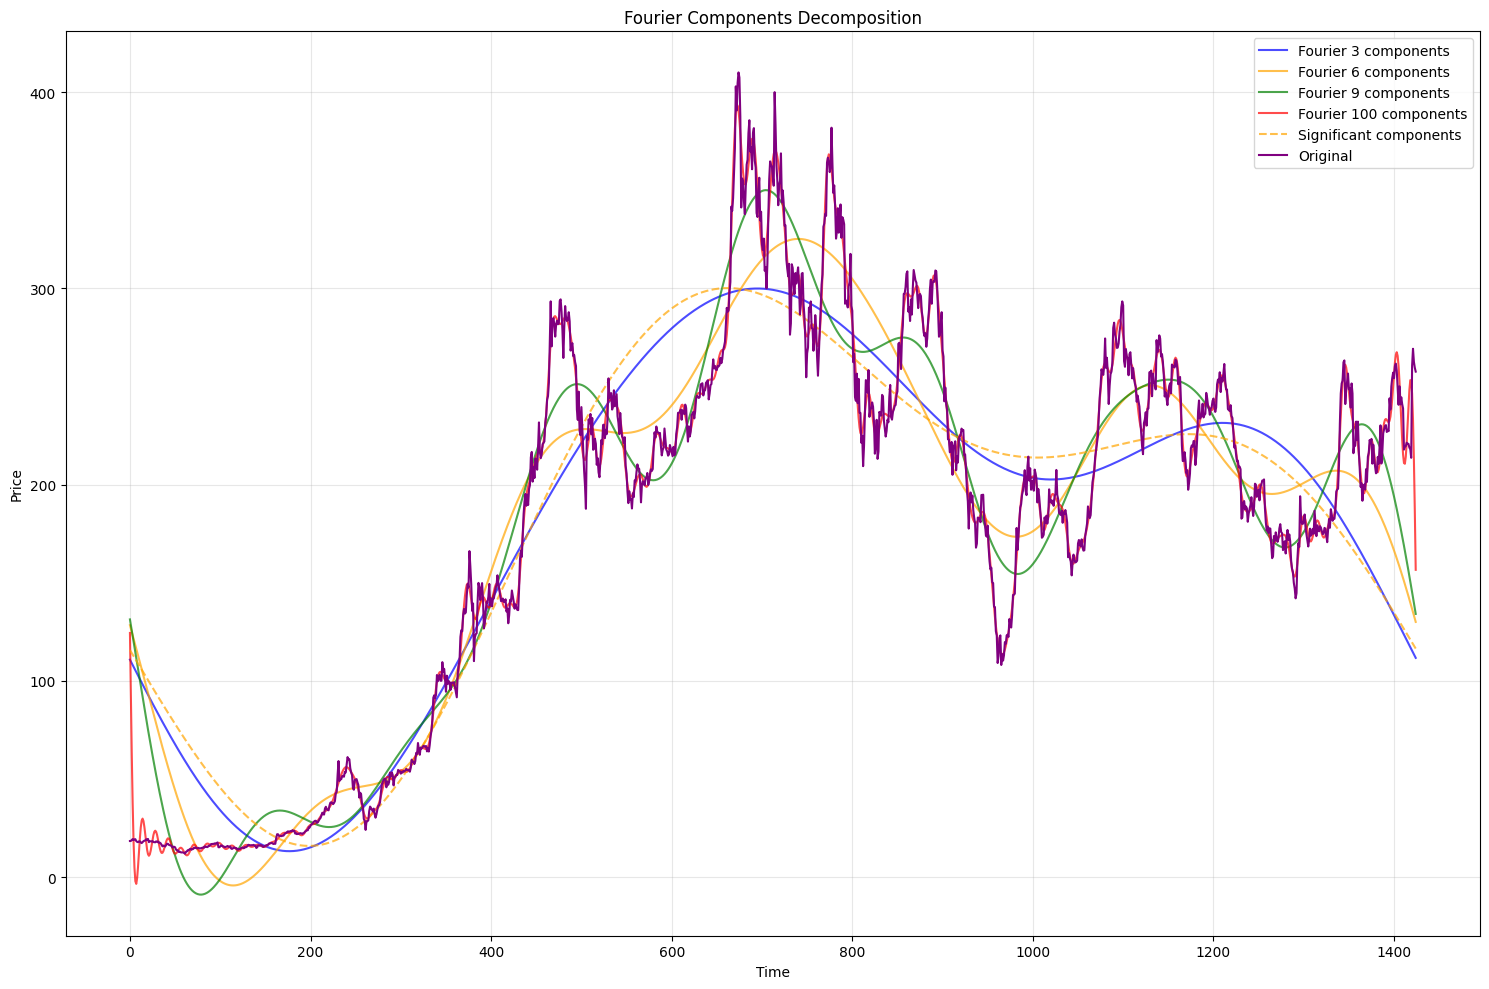

time: 404 ms (started: 2024-11-24 05:13:57 +00:00)


In [5]:
def plot_fourier_components(stock_data, figsize=(15, 10)):
    """
    Plot real parts of Fourier components and significant components
    
    Args:
        stock_data (pd.DataFrame): DataFrame containing stock price data with Close column
        figsize (tuple): Figure size for the plot
    """
    # Get close prices
    close_prices = stock_data["Close"].squeeze()
    
    # Calculate FFT
    close_fft = np.fft.fft(np.asarray(close_prices.tolist()))
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Plot Fourier components
    components = [3, 6, 9, 100]
    colors = ['blue', 'orange', 'green', 'red']
    
    for num_, color in zip(components, colors):
        # Filter FFT
        fft_filtered = np.copy(close_fft)
        fft_filtered[num_:-num_] = 0
        
        # Inverse FFT and get real part
        ifft_signal = np.fft.ifft(fft_filtered)
        
        plt.plot(ifft_signal, 
                label=f'Fourier {num_} components', 
                alpha=0.7,
                color=color)
    
    # Add significant components
    magnitude_threshold = 0.1 * np.max(np.abs(close_fft))
    significant_fft = np.copy(close_fft)
    significant_fft[np.abs(significant_fft) < magnitude_threshold] = 0
    ifft_significant = np.fft.ifft(significant_fft)
    
    plt.plot(ifft_significant, 
            label='Significant components', 
            alpha=0.7,
            color='orange',
            linestyle='--')
    
    # Plot original data
    plt.plot(close_prices.values, label='Original', color='purple')
    
    plt.title('Fourier Components Decomposition')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

plot_fourier_components(dfs_list[5][2000:])
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

series = dfs_list[0].iloc[:, 0]
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     ('Adj Close', 'AAPL')   No. Observations:                 3425
Model:                    ARIMA(5, 1, 0)   Log Likelihood               -6546.933
Date:                   Sat, 23 Nov 2024   AIC                          13105.866
Time:                           14:09:25   BIC                          13142.697
Sample:                                0   HQIC                         13119.025
                                  - 3425                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0170      0.009     -1.839      0.066      -0.035       0.001
ar.L2         -0.0251      0.010     -2.503      0.012      -0.045      -0.005
ar.L3         -0.0254      0

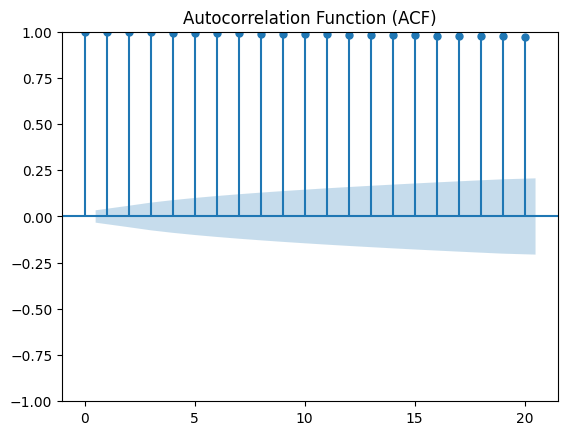

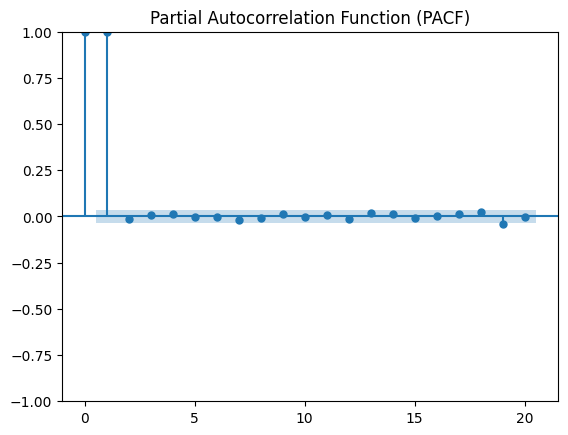

time: 350 ms (started: 2024-11-23 14:09:25 +00:00)


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Plot ACF and PACF to identify p, d, q
plot_acf(series, lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(series, lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# """
# Based on your ACF and PACF plots:

# From the ACF Plot:

# The ACF shows high and persistent autocorrelations, indicating non-stationarity.
# This suggests you need first-order differencing (d=1) to make the series stationary.
# From the PACF Plot:

# The PACF cuts off sharply after lag 2, with only the first two lags being significant.
# This suggests that the series has an AR (autoregressive) component with p=2.

# p=2: From the PACF plot.
# d=1: To account for non-stationarity observed in the ACF plot.
# q=0: Since the ACF does not show a distinct cutoff, there's no strong indication of a Moving Average (MA) component.
# Thus, the best order to start with is ARIMA(2, 1, 0).
# """

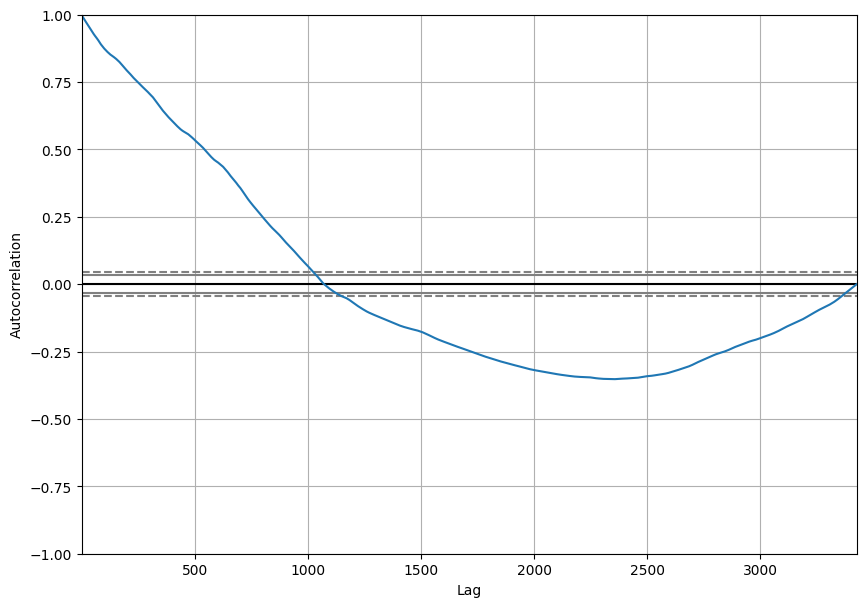

time: 198 ms (started: 2024-11-23 14:09:25 +00:00)


In [10]:
plt.figure(figsize=(10, 7), dpi=100)
autocorrelation_plot(series)
plt.show()

In [11]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

time: 2min 41s (started: 2024-11-23 14:09:26 +00:00)


Test MAE: 1.374


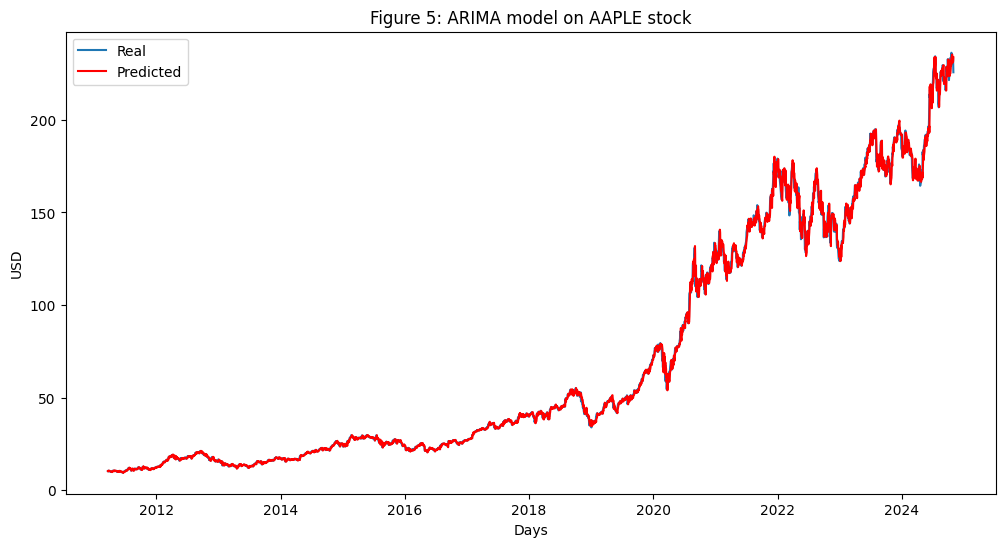

time: 157 ms (started: 2024-11-23 20:45:36 +00:00)


In [6]:
error = mean_absolute_error(dfs_list[0]["Close Next Day"], dfs_list[0]["ARIMA Output"])
print('Test MAE: %.3f' % error)

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dfs_list[0]["Close Next Day"], label='Real')
plt.plot(dfs_list[0]["ARIMA Output"], color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on AAPLE stock')
plt.legend()
plt.show()

In [38]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


X = dfs_list[0].drop('Close Next Day', axis=1)  # Replace 'target' with your actual target variable name
y = dfs_list[0]['Close Next Day']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_results = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value'], bp_test))

print(bp_test_results)

{'Lagrange multiplier statistic': 642.7359011462415, 'p-value': 4.943711884566763e-121, 'f-statistic': 37.4349158658532, 'f p-value': 1.5056465845160253e-136}
time: 26.1 ms (started: 2024-11-24 05:22:20 +00:00)


/tmp/ipykernel_112/709620707.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dfs_list[0].drop('Close Next Day', axis=1)  # Replace 'target' with your actual target variable name


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                         feature           VIF
0              (Adj Close, AAPL)  3.969330e+03
1                 (Volume, AAPL)  2.752706e+02
2                        (RSI, )  9.500133e+00
3                         (WR, )  6.757446e+00
4             (Price Momentum, )  2.370885e+00
5            (Volume Momentum, )  1.014739e+00
6                       (SD20, )           inf
7                       (SMA7, )  4.059748e+04
8                      (EMA12, )           inf
9                      (EMA26, )           inf
10                     (EMA99, )  9.073505e+02
11                      (MACD, )           inf
12                       (CCI, )  7.322939e+00
13                (Upper Band, )           inf
14                (Lower Band, )           inf
15               (Ulcer Index, )  3.981364e+00
16              (ARIMA Output, )  3.347816e+03
17             (Fourier Power, )  2.732414e+00
18             (Fourier Phase, )  1.792654e+00
19            (Fourier 3 Real, )  1.558140e+01
20           

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [16]:
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(model.resid)

print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 2.0066031779945517
time: 1.87 ms (started: 2024-11-24 05:18:39 +00:00)
